In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import enum
import copy
import connect4.connect4 as game
from pympler import asizeof
import deeplearning.buffer as buf
import torch 
import torch.nn as nn
import torch.optim as optim
import deeplearning.mlp as mlp
import torch.nn.functional as F
from deeplearning.league import League
import matplotlib.pyplot as plt

In [2]:
lea = League()

In [3]:
while True:
    lea.play_season()

Season 0 training new Agent
100 192.1526449918747 100 1.8687583
200 187.12891685962677 143 1.8393669
300 184.95730590820312 298 1.7973559
400 177.86809360980988 399 1.6929066
500 167.95298886299133 498 1.6007404
600 160.0027128458023 592 1.5343935
700 154.3623559474945 687 1.4728693
800 150.30687987804413 772 1.4174306
900 147.87062895298004 772 1.4174306
1000 145.16231679916382 981 1.3767272
1100 143.92725217342377 1089 1.3454965
1200 142.92390322685242 1089 1.3454965
1300 142.32645082473755 1298 1.3300611
1400 140.96917808055878 1298 1.3300611
1500 141.15510475635529 1485 1.3178723
1600 140.34460282325745 1485 1.3178723
Random Play
0  vs  2
p1:  0.339 p2:  0.659 draw:  0.002
2  vs  0
p1:  0.657 p2:  0.342 draw:  0.001
0  vs  1
p1:  0.332 p2:  0.667 draw:  0.001
0  vs  1
p1:  0.287 p2:  0.713 draw:  0.0
0  vs  1
p1:  0.313 p2:  0.686 draw:  0.001
1  vs  0
p1:  0.672 p2:  0.322 draw:  0.006
2  vs  1
p1:  0.568 p2:  0.426 draw:  0.006
1  vs  0
p1:  0.668 p2:  0.33 draw:  0.002
0  vs  2


KeyboardInterrupt: 

In [4]:
elo_history = {0: [924.0, 907.0, 905.0, 898.0, 902.0, 897.0, 889.0, 885.0, 884.0], 1: [1028.0, 1027.0, 1008.0, 1001.0, 999.0, 993.0, 997.0, 993.0, 988.0, 981.0], 2: [1048.0, 1038.0, 1038.0, 1031.0, 1016.0, 1009.0, 1007.0, 1007.0, 1002.0, 1006.0, 1006.0], 3: [0, 1028.0, 1021.0, 1013.0, 1017.0, 1016.0, 1006.0, 999.0, 1000.0, 995.0, 989.0], 4: [0, 0, 1028.0, 1036.0, 1021.0, 1015.0, 1013.0, 1009.0, 1010.0, 1009.0, 1002.0], 5: [0, 0, 0, 1021.0, 1022.0, 1021.0, 1014.0, 1013.0, 1007.0, 1005.0, 1005.0], 6: [0, 0, 0, 0, 1023.0, 1022.0, 1018.0, 1020.0, 1022.0, 1021.0, 1014.0], 7: [0, 0, 0, 0, 0, 1027.0, 1033.0, 1032.0, 1027.0, 1027.0, 1026.0], 8: [0, 0, 0, 0, 0, 0, 1023.0, 1027.0, 1030.0, 1028.0, 1026.0], 9: [0, 0, 0, 0, 0, 0, 0, 1015.0, 1017.0, 1014.0, 1015.0], 10: [0, 0, 0, 0, 0, 0, 0, 0, 1013.0, 1016.0, 1016.0], 11: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1014.0, 1016.0], 12: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1020.0]}

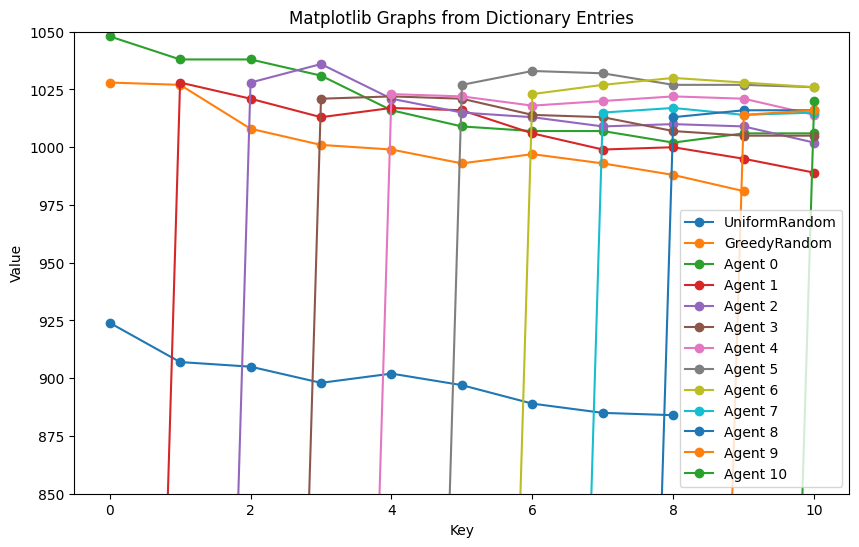

In [8]:
import matplotlib.pyplot as plt

data = elo_history

plt.figure(figsize=(10,6))
# Iterate through the dictionary entries and create separate plots
for key, values in data.items():
    name = f'Agent {key-2}'
    if key == 0:
        name = f'UniformRandom'
    elif key == 1:
        name = f'GreedyRandom'
    plt.plot([x for x in range(0, len(values))], values, marker='o', label=f'{name}')

# Add labels and title
plt.xlabel('Key')
plt.ylabel('Value')
plt.title('League Play ELO results')
plt.ylim(850, 1050)
plt.legend()  # Add legend to differentiate between entries

# Show the plots
plt.show()